# Sequence Processing with Convnets

Convolutional networks extract features from local input patches, enabling data efficiency. We can create 1D convnets where time is the dimension, and such networks can be competitive with RNNs on some sequence processing tasks, often at a fraction of the computational cost. 

A 1D convolutional layer can recognize local patterns in a sequence. We can use max or average pooling, just like we do with 2D convnets, to extract 1D subsequences that output the maximum or average value respectively. This enables subsampling the 1D inputs. 

1D convnets in Keras are implemented with the `Conv1D` layer, which takes as input 3D tensors of shape `(samples, time, features)` and returns similarly shaped tensors. The convolution window is a 1D window on the time axis (axis 1). 1D convnets consist of a stack of `Conv1D` and `MaxPooling1D` layers, ending in either a global pooling layer or a `Flatten` layer that turn the 3D outputs into 2D, which then allows you to add one or a stack of `Dense` layers for either classification or regression. 

This is similar to a 2D convnet, but in the 1D case, you can afford to use larger convolution windows (perhaps of size 7 or 9, compared with 3 for the 2D case). 

## A 1D convnet for the IMDB sentiment classification task

In [19]:
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop
import matplotlib.pyplot as plt

### Prepare IMDB data

In [20]:
max_features = 10000
max_len = 500

print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=max_len)
x_test = sequence.pad_sequences(x_test, maxlen=max_len)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
x_train shape: (25000, 500)
x_test shape: (25000, 500)


## Build 1D convnet

In [21]:
model = Sequential()
model.add(layers.Embedding(max_features, 128, input_length=max_len))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.MaxPooling1D(5))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(1))

model.summary()

model.compile(optimizer=RMSprop(lr=1e-4),
             loss='binary_crossentropy',
             metrics=['acc'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 500, 128)          1280000   
_________________________________________________________________
conv1d_7 (Conv1D)            (None, 494, 32)           28704     
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 98, 32)            0         
_________________________________________________________________
conv1d_8 (Conv1D)            (None, 92, 32)            7200      
_________________________________________________________________
global_max_pooling1d_4 (Glob (None, 32)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 33        
Total params: 1,315,937
Trainable params: 1,315,937
Non-trainable params: 0
_________________________________________________________________


## Train model

In [22]:
history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 33s - loss: 0.7699 - acc: 0.5302 - val_loss: 0.6819 - val_acc: 0.6016
Epoch 2/10
20000/20000 [==============================] - 31s - loss: 0.6630 - acc: 0.6766 - val_loss: 0.6569 - val_acc: 0.6672
Epoch 3/10
20000/20000 [==============================] - 33s - loss: 0.6120 - acc: 0.7611 - val_loss: 0.5942 - val_acc: 0.7184
Epoch 4/10
20000/20000 [==============================] - 34s - loss: 0.5124 - acc: 0.8131 - val_loss: 0.4825 - val_acc: 0.7960
Epoch 5/10
20000/20000 [==============================] - 32s - loss: 0.4055 - acc: 0.8472 - val_loss: 0.4136 - val_acc: 0.8374
Epoch 6/10
20000/20000 [==============================] - 31s - loss: 0.3488 - acc: 0.8658 - val_loss: 0.3857 - val_acc: 0.8464
Epoch 7/10
20000/20000 [==============================] - 31s - loss: 0.3087 - acc: 0.8726 - val_loss: 0.3836 - val_acc: 0.8424
Epoch 8/10
20000/20000 [==============================]

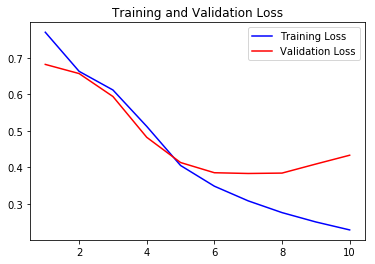

In [23]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss)+1)

plt.figure()
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

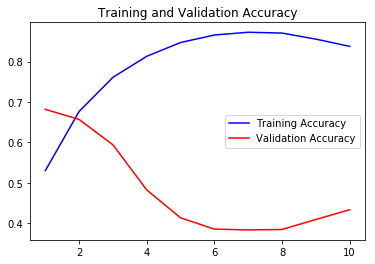

In [24]:
acc = history.history['acc']
val_acc = history.history['val_acc']
epochs = range(1, len(acc)+1)

plt.figure()
plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_loss, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

We end up with a worse validation accuracy than with the LSTM implementation of the same classifier, but training time is much faster.